# DSP - Aufgabenblatt 11

## Bewertete Übung

#### FHNW - HS2019

#### Vorgaben für die Zusammenarbeit

Sie dürfen für die Lösung der Übung zusammenarbeiten, so lange sich ihre **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.  

#### Abgabe

Arbeiten Sie auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2019.git` zu welchem Sie den Dozenten (@michael.graber) als *Maintainer* hinzufügen. Committen Sie regelmässig. Als Abgabe gilt ihr **letzter Commit vor Montag, 23. Dezember 2019, 24 Uhr**.

#### Hinweise
- Der *Code* muss von Anfang bis Ende durchlaufen. Es wird nur Code bewertet, welcher beim automatischen Durchlaufen ausgeführt wird.    
- Beschriften Sie sämtliche Achsen (Bezeichnung und Einheit wenn möglich).  
- Ergänzen Sie den Plot mit zusätzlicher Beschriftung falls dies zum Verständnis des Plots notwendig ist.  
- Wenn Sie einen Plot in einer Antwort diskutieren, beginnen Sie mit einer Beschreibung dessen was der Plot zeigt.  


- Sämtliche Variablen die in einer von Ihnen definierten Funktionen verwendet werden, müssen als Argumente übergeben  oder innerhalb der Funktion definiert werden.
- Selbst definierte Funktionen müssen einen (kurzen) docstring haben.


- Versuchen Sie eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichen Sie bloss mit performantem *Code*.  
- Verwenden Sie dazu, wo immer möglich und sinnvoll, Funktionen aus `pandas` und `numpy`.
- Vermeiden Sie *Loops* falls möglich.

Am 14. April 1912 ist die Titanic vor der Küste Neufundlands auf ihrer Jungfernfahrt mit einem Eisberg kollidiert und sank kanpp 3 Stunden später in den frühen Morgenstunden des 15. Aprils. Von den ca 2224 Passagieren und Crewmitgliedern starben rund 1500.  

Auf der Website https://www.encyclopedia-titanica.org/ können Passagier- und Crewlisten runtergeladen werden. Ich habe Ihnen zwei Dateien bereitgestellt: 'data/titanic_survivors.csv' und 'data/titanic_victims.csv'. Sie beinhalten jeweils die Überlebenden und Opfer des Unglücks.  

Wir werden in dieser Übung die Personen hinter diesem Unglück miteinander untersuchen.

### Aufgabe 1 (10 Punkte)  

Schreiben Sie eine Funktion, mit welcher Sie die beiden Dateien laden und präprozessieren können.  

Die Funktion soll ein `DataFrame` zurückgeben mit folgenden Spalten: `'name', 'sex', 'age', 'is_adult', 'job', 'class_dept', 'is_passenger', 'joined', 'boat_body', 'ticketprice', 'survived',`.  


- Der Ticketpreis steht bei Passagieren jeweils auf der folgenden Zeile im Feld `Ticket`. Extrahieren Sie Pfund, Shilling und Pence mittels *regular expression-matching* auf dem `DataFrame`.
- Berechnen Sie einen Dezimalbetrag in Pfund gemäss dem folgenden Satz: *'There were 12 pence in a shilling and 20 shillings in a pound.'* 
- Leiten Sie das Geschlecht `sex` aus dem Namen, insbesondere aus der Anrede, ab. Finden Sie einen geeignete `pandas`-Methode für das *Mapping*.
- Berechnenen Sie das Alter für alle Personen in Jahren (`m` steht für *months*).
- `is_passenger` soll `True` sein, falls `class_dept` in `['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger',]` ist.  
- Sortieren Sie das `DataFrame` nach dem Familiennamen.

Jeder *for-Loop* gibt 2 Punkte Abzug.  

Laden Sie die Daten und geben Sie die ersten 10 Zeilen aus.

In [1]:
# imports
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_victims_df = '../../data/titanic_victims.csv'
titanic_survivors_df = '../../data/titanic_survivors.csv'

In [3]:
def cleanDataFrame(df_1, df_2):
    """
    Returns a preprocessed dataframe that was merged from two dataframes
    """ 
    #load data
    df_1 = pd.read_csv(df_1, skiprows=5, sep=',', usecols=range(7))
    df_2 = pd.read_csv(df_2, skiprows=5, sep=',', usecols=range(7))
    
    #Shift ticketprice and drop unused row
    df_1.insert(3, 'Ticketprice', np.NaN)
    ticket_prices = df_1.loc[df_1['Ticket'].str.contains('£|s|d') == True, ['Ticketprice']] = df_1['Ticket']
    df_1['Ticketprice'] = df_1['Ticketprice'].shift(-1)
    df_1 = df_1.dropna(subset=['Name'])
    
    df_2.insert(3, 'Ticketprice', np.NaN)
    ticket_prices = df_2.loc[df_2['Ticket'].str.contains('£|s|d') == True, ['Ticketprice']] = df_2['Ticket']
    df_2['Ticketprice'] = df_2['Ticketprice'].shift(-1)
    df_2 = df_2.dropna(subset=['Name'])
    
    # drop not neccassary row with NaN
    df_1 = df_1.dropna(subset=['Name'])
    df_2 = df_2.dropna(subset=['Name']) 
    
    #create new column for survived
    df_1.insert(8, 'Survived', False)
    df_2.insert(8, 'Survived', True)
    
    #Merge two files
    frames = [df_1, df_2]
    result_df = pd.concat(frames, ignore_index=True, sort=False)
    
    #drop Ticket
    result_df = result_df.drop(columns=['Ticket'])
    
    
    #Rename columns
    result_df.rename(columns={'Name': 'name', 'Age': 'age', 'Job': 'job', 'Class/Dept': 'class_dept', 'Joined': 'joined', 
                              'Boat [Body]': 'boat_body', 'Ticketprice': 'ticketprice', 'Survived': 'survived'}, inplace=True)

    
    # Calculate a decimal amount in pounds
    result_df.insert(4, 'pound', np.NaN)
    result_df.insert(5, 'shilling', np.NaN)
    result_df.insert(6, 'pence', np.NaN)
    
    result_df['pound'] = result_df['ticketprice'].str.extract(pat = '£(\d*)')
    result_df['shilling'] = result_df['ticketprice'].str.extract(pat = '(\d*)s')
    result_df['pence'] = result_df['ticketprice'].str.extract(pat = '(\d*)d')
    
    #Replace Nan-Values
    values = {'job':'unknown', 'boat_body':'unknown', 'pound': 0, 'shilling': 0, 'pence': 0}
    result_df = result_df.fillna(value=values)
    
    # save calculated amount in pounds
    result_df['ticketprice'] = result_df['pound'].astype('float64') + result_df['shilling'].astype('float64') / 20 + result_df['pence'].astype('float64') / 240
    
    #clean Age column with years (m=months)
    result_Age = result_df.loc[result_df['age'].str.contains('m') == True, ['age']] = round((1/12) * result_df['age'].str.split('m').str[0].astype('float64'), 3)
    
    #insert new columns
    result_df.insert(1, 'sex', np.NaN)
    result_df.insert(3, 'is_adult', np.NaN)
    result_df.insert(5, 'is_passenger', np.NaN)
    
    # Give is_Adult values
    result_df['age']= result_df['age'].astype(float)
    is_adult = result_df.loc[result_df['age'] > 17, ['is_adult']] = True
    is_adult = result_df.loc[result_df['age'] < 18, ['is_adult']] = False
    #result_df['is_adult'] = result_df.loc[result_df['age'] < 18, ['is_adult']] == False
    
    # is_passenger soll True sein, falls class_dept in ['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger',] ist.
    result_df['is_passenger'] = result_df['class_dept'].isin(['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger'])
    
    # split name for salutation
    result_df.insert(0, 'salutation', np.NaN)
    result_df['salutation'] = result_df['name'].str.split(',', n=1, expand = False).str[1]
    result_df['salutation'] = result_df['salutation'].str.split(' ', n=1, expand = False).str[0]
    result_df['salutation'] = result_df['salutation'].str.extract(pat = '([A-Z][a-z]*)')
    
    
    # Mapping for sex
    result_df['sex'] = result_df['salutation'].map({'Mr': 'Male', 'Master': 'Male', 'Major': 'Male', 'Dr': 'Male', 'Sig': 'Male', 'Colonel': 'Male',
                                                      'Revd': 'Male', 'Fr': 'Male', 'Rev': 'Male', 'Captain': 'Male', 'Sr': 'Male', 'Don': 'Male', 
                                                      'Col': 'Male', 'Sir': 'Male', 'Mme': 'Female', 'Lucy':'Female', 'Sra': 'Female', 
                                                      'Mlle': 'Female', 'Mrs': 'Female', 'Miss': 'Female', 'Do': 'Female', 'Ms': 'Female'})
    
    # Mapping for sex special case Alice May
    result_df.loc[result_df['name'].str.contains('Alice May') == True, ['sex']] = 'Female'
    
    # delete not needed column salutation
    result_df = result_df.drop(columns=['salutation', 'pound', 'shilling', 'pence'])
    
    # reindex the columns
    result_df.reindex(columns =['name', 'sex', 'age', 'is_adult', 'job', 'class_dept', 'is_passenger', 'joined', 'boat_body', 'ticketprice', 'survived'])
    
    # sort dataframe --> familyname
    cleaned_result_df = result_df.sort_values(by=['name'], ascending=True)
    cleaned_result_df.to_csv('titanic.csv')
    #print(cleaned_result_df['sex'].value_counts())
    #print(len(cleaned_result_df))
    
    
    return cleaned_result_df

In [4]:
titanic_df = cleanDataFrame(titanic_victims_df, titanic_survivors_df)
titanic_df.head(10)

,name,sex,age,is_adult,class_dept,is_passenger,ticketprice,joined,job,boat_body,survived
0,"ABBING, Mr Anthony",Male,41.0,True,3rd Class Passenger,True,7.550,Southampton,Blacksmith,unknown,False
1496,"ABBOTT, Mrs Rhoda Mary 'Rosa'",Female,39.0,True,3rd Class Passenger,True,20.250,Southampton,unknown,A,True
3,"ABBOTT, Mr Ernest Owen",Male,21.0,True,Victualling Crew,False,0.000,Southampton,Lounge Pantry Steward,unknown,False
2,"ABBOTT, Mr Eugene Joseph",Male,13.0,False,3rd Class Passenger,True,20.250,Southampton,Scholar,unknown,False
1,"ABBOTT, Mr Rossmore Edward",Male,16.0,False,3rd Class Passenger,True,20.250,Southampton,Jeweller,[190],False
1497,"ABELSETH, Miss Karen Marie",Female,16.0,False,3rd Class Passenger,True,7.650,Southampton,unknown,16,True
1498,"ABELSETH, Mr Olaus Jørgensen",Male,25.0,True,3rd Class Passenger,True,7.650,Southampton,Farmer,A,True
1499,"ABELSON, Mrs Anna",Female,24.0,True,2nd Class Passenger,True,24.000,Cherbourg,unknown,10,True
4,"ABELSON, Mr Samuel",Male,30.0,True,2nd Class Passenger,True,24.000,Cherbourg,unknown,unknown,False
1500,"ABRAHAMSSON, Mr August Abraham Johannes",Male,19.0,True,3rd Class Passenger,True,7.925,Southampton,unknown,15,True


### Aufgabe 2 (8 Punkte)

Wieviele Personen sind es insgesamt?  

Wieviele Personen ohne Ticketpreis?  

Wieviele Personen ohne Altersangabe?  

Wieviele Personen männlichen und weiblichen Geschlechts fanden sich gemäss unserem Datensatz auf der Titanic?  

Wie viele Kinder, welchen Geschlechts?  

Was war der durchschnittliche Preis für eine Fahrkarte?  

Was war das Durchschnittsalter der Besatzungsmitglieder? Was war das Durchschnittsalter der Passagiere?

In [5]:
# Wieviele Personen sind es insgesamt?
print('Es sind insgesamt', len(titanic_df['is_passenger']), 'Personen')

# Wieviele Personen ohne Ticketpreis?
print('Es gibt insgesamt', (titanic_df['ticketprice'] == 0.0).sum(), 'Personen ohne Tickets')

# Wieviele Personen ohne Altersangabe?
print('Es gibt insgesamt', titanic_df['is_adult'].isna().sum(), 'Personen die keine Altersangabe haben')
print('--------------------------------------------')

# Wieviele Personen männlichen und weiblichen Geschlechts fanden sich gemäss unserem Datensatz auf der Titanic?
print('Anzahl Frauen und Männer: ', titanic_df['sex'].value_counts())
print('--------------------------------------------')

# Wie viele Kinder, welchen Geschlechts? 
children = titanic_df.loc[titanic_df['is_adult'] == False]
print('Es gibt insgesamt', children['is_adult'].count(), 'Kinder')
print('Anzahl Mädchen und Jungs auf der Titanic:', children.groupby(['sex']).count().age)
print('--------------------------------------------')

# Was war der durchschnittliche Preis für eine Fahrkarte?
mean = titanic_df['ticketprice'].mean()
print('Der Durchschnittliche Ticketpreis für eine Fahrkarte war:', '{:.2f}'.format(mean), 'Pfund')

#Was war das Durchschnittsalter der Besatzungsmitglieder?
staff_titanic = titanic_df.drop(titanic_df[titanic_df.is_passenger == True].index)
staff_titanic = staff_titanic.drop(staff_titanic[staff_titanic.age.isna()].index)
staff_titanic = staff_titanic.age.astype('float64').mean()
print('Das Durchschnittsalter der Besatzungsmitglieder ist:', '{:.2f}'.format(staff_titanic), 'Jahre')

#Was war das Durchschnittsalter der Besatzungsmitglieder?
passengers = titanic_df.drop(titanic_df[titanic_df.is_passenger == False].index)
passengers = passengers.drop(passengers[passengers.age.isna()].index)
passengers = passengers.age.astype('float64').mean()
print('Das Durchschnittsalter der der Passagiere ist:', '{:.2f}'.format(passengers), 'Jahre')

Es sind insgesamt 2208 Personen
Es gibt insgesamt 917 Personen ohne Tickets
Es gibt insgesamt 3 Personen die keine Altersangabe haben
--------------------------------------------
Anzahl Frauen und Männer:  Male      1719
Female     489
Name: sex, dtype: int64
--------------------------------------------
Es gibt insgesamt 203 Kinder
Anzahl Mädchen und Jungs auf der Titanic: sex
Female     82
Male      121
Name: age, dtype: int64
--------------------------------------------
Der Durchschnittliche Ticketpreis für eine Fahrkarte war: 19.74 Pfund
Das Durchschnittsalter der Besatzungsmitglieder ist: 31.73 Jahre
Das Durchschnittsalter der der Passagiere ist: 29.63 Jahre


### Aufgabe 3 (3 Punkte)

Erstellen Sie eine Kreuztabelle von Einstiegsort und `class_dept`.  

Visualisieren Sie die Tabelle.  
Wir wissen, dass die Titanic von *Belfast*, wo sie gebaut wurde, nach *Southhampton*, nach *Cherbourg* und dann nach *Queenstown* fuhr, bevor Sie zur Atlantiküberfahrt auslief.  

Diskutieren Sie Ihre Erkenntnisse.

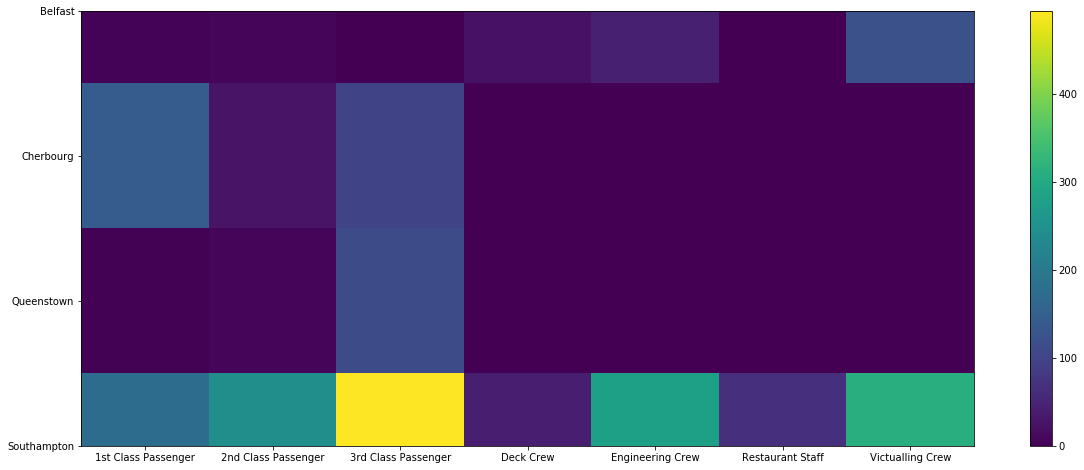

In [6]:
pd.crosstab(titanic_df['joined'], titanic_df['class_dept']) # Reihenfolge?
ct = pd.crosstab(titanic_df['joined'], titanic_df['class_dept']) # Reihenfolge?
fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(ct.values, aspect='auto')
_ = ax.set_xticks(range(len(ct.columns)))
_ = ax.set_xticklabels(ct.columns)
_ = ax.set_yticks(range(len(ct.index)))
_ = ax.set_yticklabels(ct.index)
_ = plt.colorbar(im)

Die Visualisierung zeigt die verschiedenen (Menschen)-Klassen welche in verschiedene Orten in das Boot eingestiegen sind. In der Visualiserung kann man sehen, dass am ersten Anlageort in Belfast praktisch nur Crew-Mitglieder eingestiegen sind und bei Southhampton, die zweite Anlegestelle, am meisten Passagiere eingesteigen sind. Vorallem kam bei Southhampton ein Grossteil der Passagiere an Board und noch einen grossen Teil der Besatzung. Bei den zwei weiteren Anlegestellen kamen noch ein paar Passagiere dazu aber keine Besatzungsmitglieder mehr. 

Fazit ist dass am meisten an der Anlegestelle Southhampton los war.

### Aufgabe 4 (5 Punkte)

Visualisieren Sie die Altersverteilung für die beiden Geschlechter und gleichzeitig für Variable `class_dept` mit Boxplots.  

Diskutieren Sie die Visualisierung.
- Erklären Sie was ein Boxplot zeigt.
- Was für Information fehlt?
- Was können wir zu den vorliegenden Daten aus dieser Darstellung lesen?

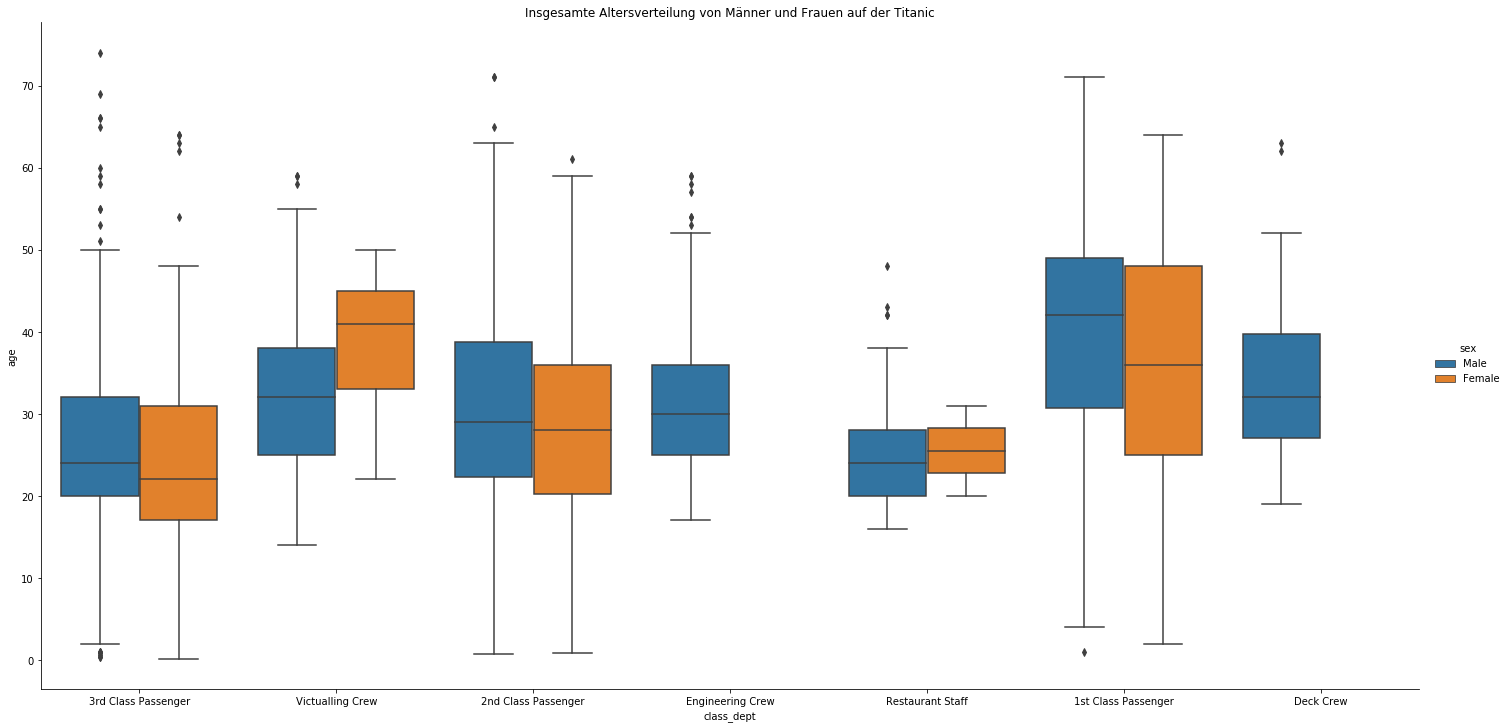

In [56]:
_ = sns.catplot(data=titanic_df, x='class_dept', y='age', hue='sex', orient='v', kind='box', height=10, aspect=2)
plt.title("Insgesamte Altersverteilung von Männer und Frauen auf der Titanic")
plt.show()

##### Erklären Sie was ein Boxplot zeigt

--> Der Boxplot zeigt im wesentlichen die Verteilung der Daten. Der Strich in der Box ist der Median (50% der Datenwerte sind kleiner oder gleich diesem Kennweert). Die untere Grenze des Blots ist das untere Quartiel (kleinsten 25% der Datenwerte sind kleiner als diese Grenze oder gleich) und die obere Grenze der Box zeigt das obere Quartiel (kleinsten 75% der Datenwerte sind kleiner oder gleich dieser Grenze). 
Das Minimum ist der kleinste Wert des Datensatzes und ist beim Ende des unteren Whiskers oder beim weitentferntesten Ausreisser (Punkte) nach dem unteren Whiskers. Das gleiche gilt beim Maximum, welche der grösste Wert des Datensatzen darstellt, entweder beim Whiskers oder beim weit entferntesten Ausreisser.
Die Spannweite wird definiert durch die Länge des Boxplots, also mit den Ausreissern dazugezählt. 


##### Was für Information fehlt?

--> Für die Visualisierung fehlen keine weiter Informationen. Alles ist ersichtlich in der Visualisierung. 


##### Was können wir zu den vorliegenden Daten aus dieser Darstellung lesen?

--> Die Daten zeigen, dass bei den Passagieren die Verteilung des Alters bei den Männer und Frauen ziemlich ähnlich ist. Auch die Anzahl ist ähnlich, da sie wahrscheinlich als Familie oder als Paar zusammen auf die Titanic gegangen sind. Die 1st Class Passenger sind tendeziell eher älter vorallem die Männer, weil diese wahrscheinlich mehr Geld hatten um sich eine bessere Klasse zu kaufen.
Bei der Besatzung ist bei "Victualling Crew" die Anzahl ähnlich, aber die Frauen waren tendenziell eher älter als die männlichen Arbeiter. Bei der "Engineering Crew" und der "Deck Crew" gab es nur Männer die ca. Mitte 30 waren, also noch in guter körperlicher Verfassung um schwere Arbeit auf der Titanic zu leisten. 


### Aufgabe 5 (4 Punkte)

Zeichnen Sie die Verteilung des Alters sämtlicher Passagiere als Histogramm.  

Beschreiben Sie die Verteilung bezüglich Lage, Streuung und Form.  

Sie dürfen verschiedene Ansätze verwenden und deren Resultate und Eigenschaften diskutieren.

Standardabweichung der Visualisierung: 13.90
Maximal Alter: 74.0
Minimal Alter: 0.167
Median: 28.00
Mittelwert: 29.63
1 Quartiel: 21.0
3 Quartiel: 38.0
Spannweite von Altersverteilung: 73.833


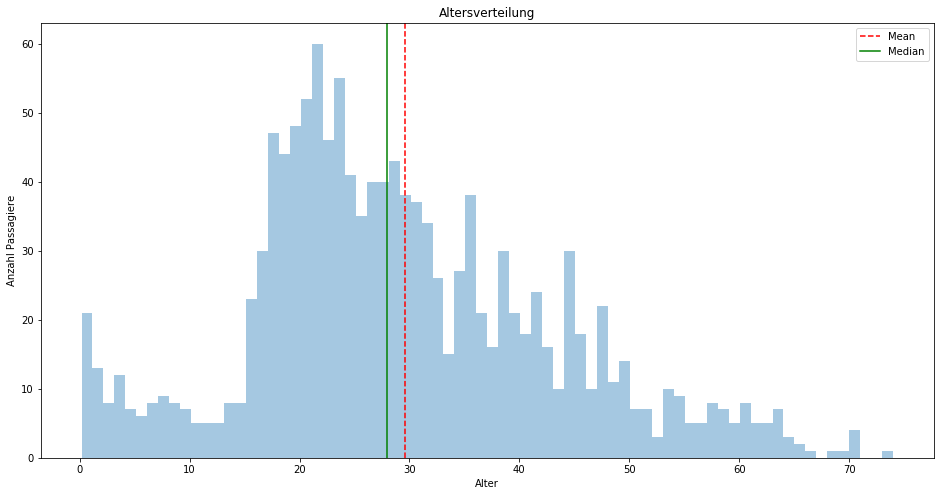

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Alter von allen Passagieren nehmen
passenger = titanic_df.loc[titanic_df['is_passenger'] == True]

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.distplot(passenger['age'], bins=74, kde=False)

# Lage der Verteilung
mean=passenger['age'].mean()
median=passenger['age'].median()

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Anzahl Passagiere')

# Streuung der Verteilung
std = passenger['age'].std()
quartile_1 = passenger.age.quantile(0.25)
quartile_3 = passenger.age.quantile(0.75)
print('Standardabweichung der Visualisierung:', '{:.2f}'.format(std))
print('Maximal Alter:',passenger['age'].max())
print('Minimal Alter:',passenger['age'].min())
print('Median:', '{:.2f}'.format(median))
print('Mittelwert:', '{:.2f}'.format(mean))
print('1 Quartiel:', quartile_1)
print('3 Quartiel:', quartile_3)
print('Spannweite von Altersverteilung:', passenger['age'].max() - passenger['age'].min())


# Form der Verteilung
# Die Visualisierung hat eine linkssschiefe Verteilung.

Der Plot zeigt die Verteilung des Alters der Leute auf der Titanic. In der Visualisierung kann man sehen dass die meisten Leute auf der Titanic zwischen 22 und 38 Jahre waren. Der Mitelwert des Alters liegt bei 30.48 Jahren. Es gab vergleichsweise noch viele Säugline auf dem Boot aber ältere Leut eher weniger. 
Die Form de Visualisierung hat eine rechtssschiefe Verteilung.

### Aufgabe 6 (3 Punkte)

Führen Sie die Schritte aus Aufgabe 5 für den Ticketpreis aus.  

Visualisieren Sie zusätzlich die kumulative Verteilung.  

Diskutieren Sie Ihre Erkenntnisse.

Standardabweichung der Visualisierung: 51.92
Median: 7.75
Mittelwert: 19.74
Maximaler Ticketpreis: 512.33
Minimaler Ticketpreis: 0.00
1 Quartil: 7.90
3 Quartil: 31.27
Spannweite von Ticketpreisverteilung: 512.33


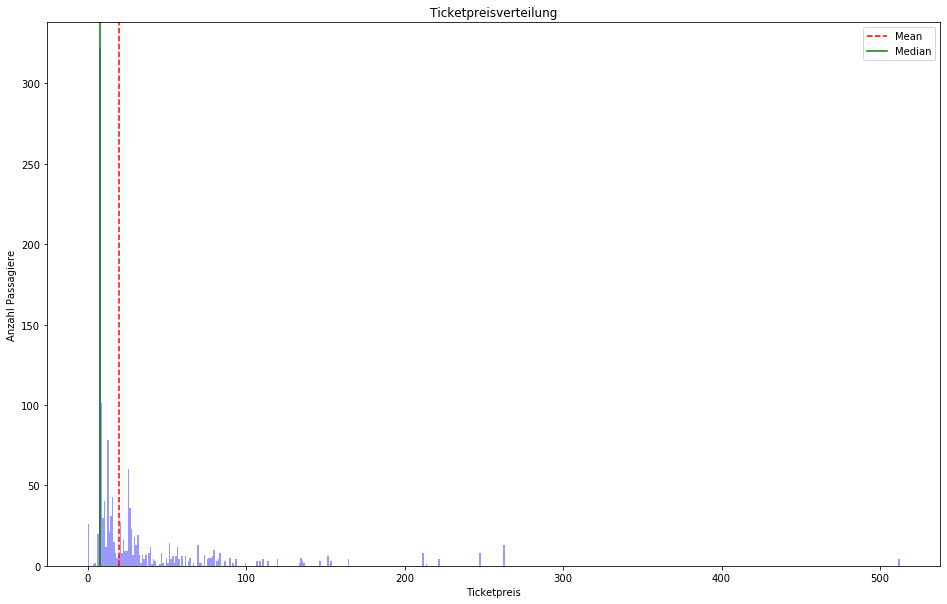

In [27]:
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.distplot(passenger['ticketprice'], kde=False, bins=512, color='blue')

# Lage der Verteilung
mean=titanic_df['ticketprice'].mean()
median=titanic_df['ticketprice'].median()

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title('Ticketpreisverteilung')
plt.xlabel('Ticketpreis')
plt.ylabel('Anzahl Passagiere')

# Streuung der Verteilung
std = passenger['ticketprice'].std()
max_ticket = passenger['ticketprice'].max()
min_ticket = passenger['ticketprice'].min()
quartile_1 = passenger.ticketprice.quantile(0.25)
quartile_3 = passenger.ticketprice.quantile(0.75)
print('Standardabweichung der Visualisierung:', '{:.2f}'.format(std))
print('Median:', '{:.2f}'.format(median))
print('Mittelwert:', '{:.2f}'.format(mean))
print('Maximaler Ticketpreis:', '{:.2f}'.format(max_ticket))
print('Minimaler Ticketpreis:', '{:.2f}'.format(min_ticket))
print('1 Quartil:', '{:.2f}'.format(quartile_1))
print('3 Quartil:', '{:.2f}'.format(quartile_3))
print('Spannweite von Ticketpreisverteilung:', '{:.2f}'.format(max_ticket - min_ticket))

# Form der Verteilung
#Die Visualisierung hat eine Heavy-Tail-Verteilung welche linksschief ist

Der Plot zeigt die Verteilung der Ticketspreise auf der Titanic. Die Besatzungmitglieder hatten keine Tickets, es mussten nur die Passagiere Tickets für die Fahrt kaufen. Es wird im Plot ersichtlich, dass es einige Tickets bei Null gibt (welche gratis waren) und viele Ticketpreise im Bereich 0£ und 20.25£ liegen. Durchschnittlich hat man für die Titanic-Fahrt 19.74 Pfund zahlen müssen. Zudem ist auch ersichtlich, dass es vereinzelt ein paar sehr teure Tickets gab die über 100£ teuer waren. Ein Aussreise ist ein Ticket welches 512.33 Pfund gekostet hat. Zudem zeigt der Plot eine Heavy-Tail-Verteilung.

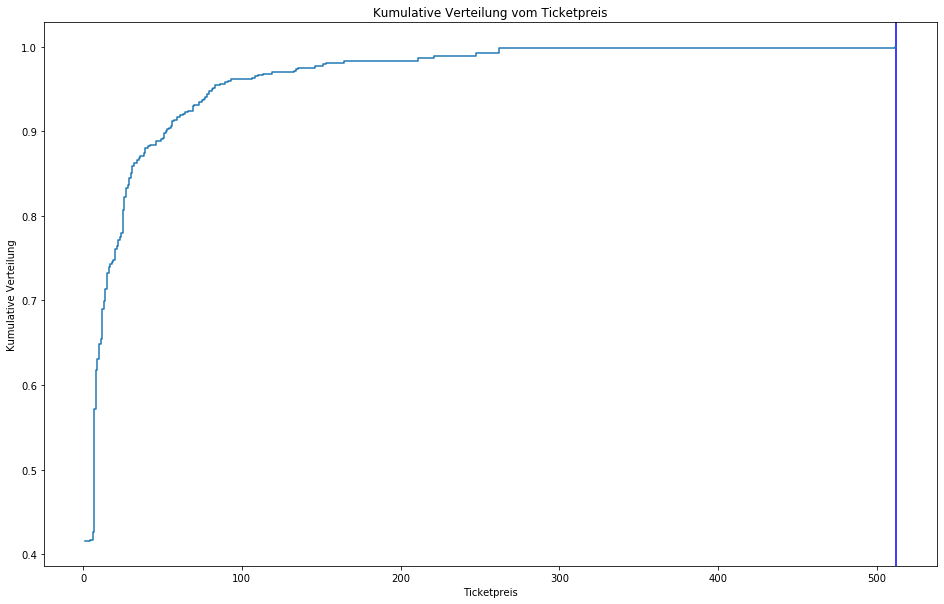

In [30]:
# kumulative Verteilung
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 10))

counts, bins = np.histogram(titanic_df['ticketprice'], bins=512, density=False)
#counts, bins, patch = ax.hist(titanic_df['ticketprice'], histtype='step', bins=512, density=True)
max_val = titanic_df['ticketprice'].max()
ax.axvline(max_val, color='b', linestyle='-')
ax = ax.step(bins[1:], (counts/counts.sum()).cumsum())

plt.title('Kumulative Verteilung vom Ticketpreis')
plt.xlabel('Ticketpreis')
plt.ylabel('Kumulative Verteilung')
plt.show()

Der Plot mit der kumulativen Verteilung zeigt eine logarithmische Form. Es zeigt, dass ein grosser Teil der Tickets bei wenigen Pfungen (bei ca ~8£ Tickets) stark ansteigt, weil ab dort die meisten Tickets gekauft wurden. Nach 100£ Tickets wurden fast keine Tickets mehr verkauft was sich beim Plot bei der fast flachen Linie wiederspeigelt.

### Aufgabe 7 (3 Punkte)

Was sind die häufigsten 10 Berufe der Passagiere, welche oberhalb des $Q_{0.9}$-Quantils des Ticketpreises liegen?  

Was sind die häufigsten 10 Berufe der Passagiere, welche unterhalb des $Q_{0.1}$-Quantils des Ticketpreises liegen?  

Wie oft kommen die Berufe jeweils vor?  
Wie interpretieren Sie das Resultat?

Oberes Q0.9-Quantil des Ticketpreises 77.96


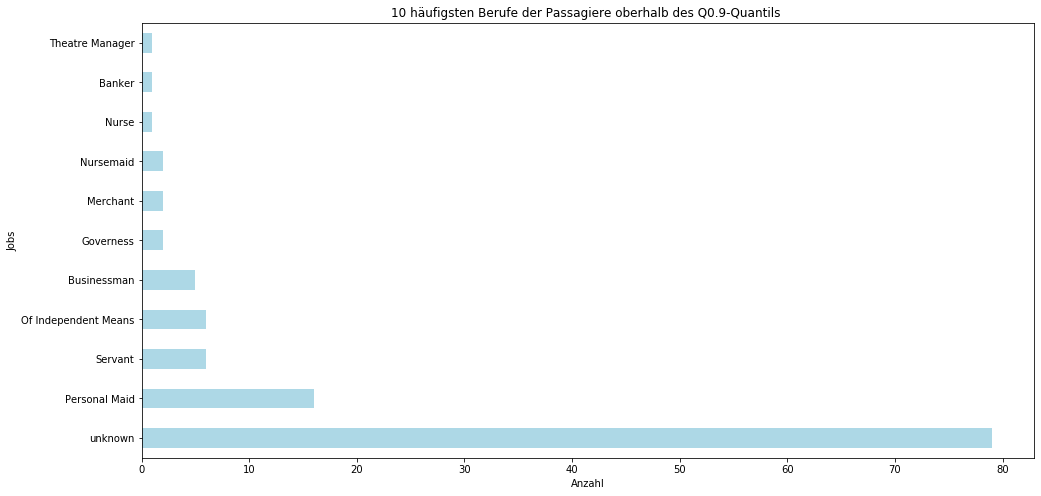

In [53]:
passenger = titanic_df.loc[titanic_df['is_passenger'] == True]

quant_10, quant_90 = np.percentile(passenger['ticketprice'], [10, 90])
print('Oberes Q0.9-Quantil des Ticketpreises', '{:.2f}'.format(quant_90))

titanic_df_quant_90 = passenger.loc[passenger['ticketprice'] > quant_90]
titanic_df_quant_10 = passenger.loc[passenger['ticketprice'] < quant_10]

fig, ax = plt.subplots(figsize=(16,8))
titanic_df_quant_90['job'].value_counts()[:11].plot(kind='barh', color='lightblue')
plt.title('10 häufigsten Berufe der Passagiere oberhalb des Q0.9-Quantils ')
plt.xlabel('Anzahl')
plt.ylabel('Jobs')
plt.show()

Unteres Q0.1-Quantil des Ticketpreises 7.54


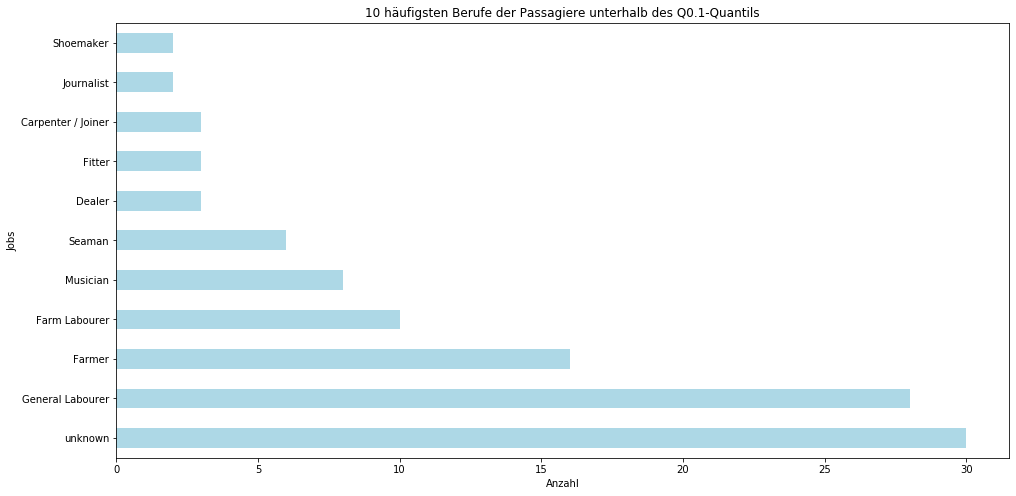

In [54]:
print('Unteres Q0.1-Quantil des Ticketpreises', '{:.2f}'.format(quant_10))

fig, ax = plt.subplots(figsize=(16,8))
titanic_df_quant_10['job'].value_counts()[:11].plot(kind='barh', color='lightblue')
plt.title('10 häufigsten Berufe der Passagiere unterhalb des Q0.1-Quantils')
plt.xlabel('Anzahl')
plt.ylabel('Jobs')
plt.show()

Antwort

### Aufgabe 8 (6 Punkte)

Finden Sie ein paar wenige Visualisierungen, welche es ermöglichen, kompakt einen Eindruck zu bekommen, wer das Unglück der Titanic am wahrscheinlichsten überlebt hat.  

Was ist ihre Erkenntnis?

Es gab insgesamt 712 Menschen von 2208 Menschen die überlebt haben.


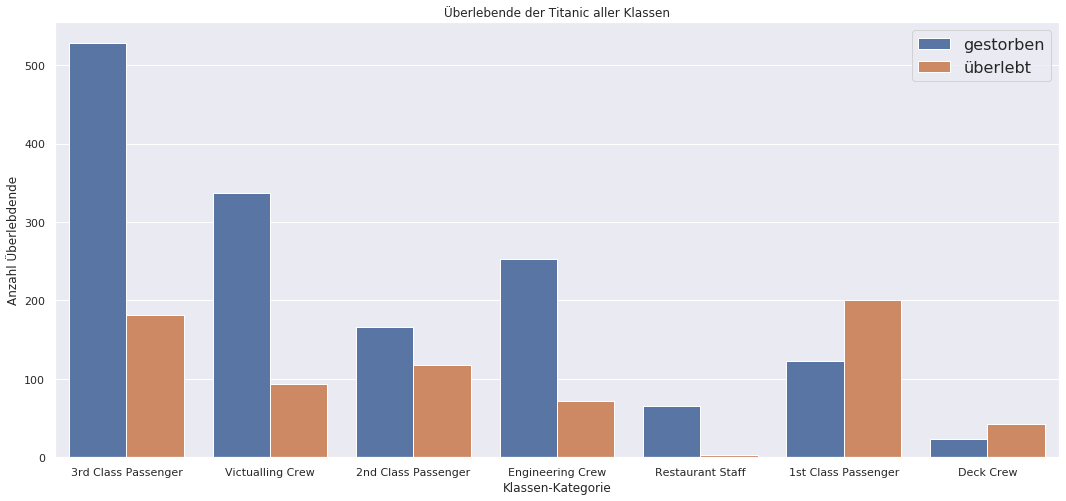

In [114]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(18, 8))
adult = titanic_df.loc[titanic_df['survived'] == True]

sns.set(style="darkgrid")
ax = sns.countplot(x='class_dept', hue='survived', data=titanic_df)


print('Es gab insgesamt', adult['survived'].count(), 'Menschen von', len(titanic_df['is_passenger']), 'Menschen die überlebt haben.')
plt.title('Überlebende der Titanic aller Klassen')
plt.ylabel('Anzahl Überlebdende')
plt.xlabel('Klassen-Kategorie')
plt.legend(['gestorben', 'überlebt'], prop={'size': 16});
plt.show()

Es gab insgesamt 353.0 Männer von 1719 Männer die überlebt haben.


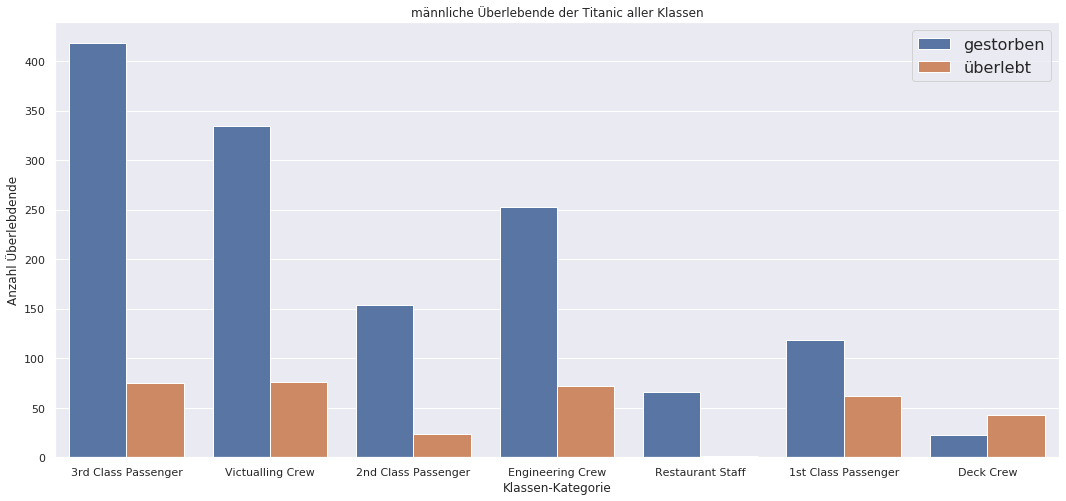

In [115]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(18, 8))
adult = titanic_df.loc[titanic_df['sex'] == 'Male']

sns.set(style="darkgrid")
ax = sns.countplot(x='class_dept', hue='survived', data=adult)

print('Es gab insgesamt', adult.groupby('class_dept').sum().survived.sum(), 'Männer von', (titanic_df['sex'] == 'Male').sum(), 'Männer die überlebt haben.')
plt.title('männliche Überlebende der Titanic aller Klassen')
plt.ylabel('Anzahl Überlebdende')
plt.xlabel('Klassen-Kategorie')
plt.legend(['gestorben', 'überlebt'], prop={'size': 16});
plt.show()

Es gab insgesamt 359.0 Frauen von 489 Frauen die überlebt haben.


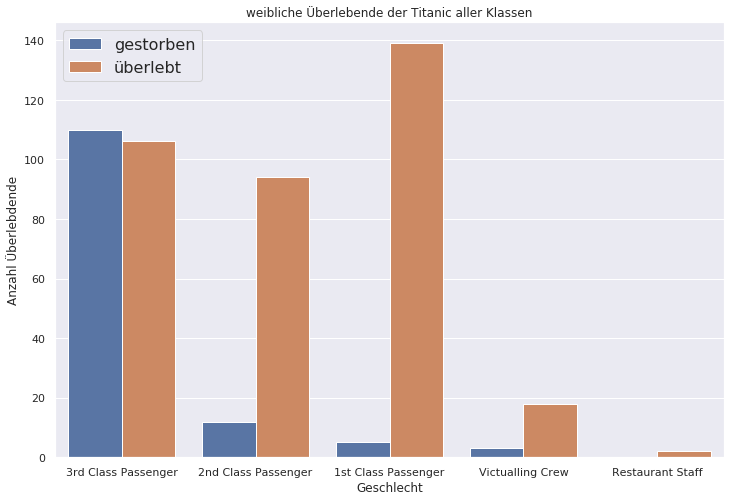

In [116]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
adult = titanic_df.loc[titanic_df['sex'] == 'Female']

sns.set(style="darkgrid")
ax = sns.countplot(x='class_dept', hue='survived', data=adult)

print('Es gab insgesamt', adult.groupby('class_dept').sum().survived.sum(), 'Frauen von', (titanic_df['sex'] == 'Female').sum(), 'Frauen die überlebt haben.')
plt.title('weibliche Überlebende der Titanic aller Klassen')
plt.ylabel('Anzahl Überlebdende')
plt.xlabel('Geschlecht')
plt.legend(['gestorben', 'überlebt'], prop={'size': 16});
plt.show()

Es gab insgesamt 625.0 Erwachsene von 2002 Erwachsenen die überlebt haben.


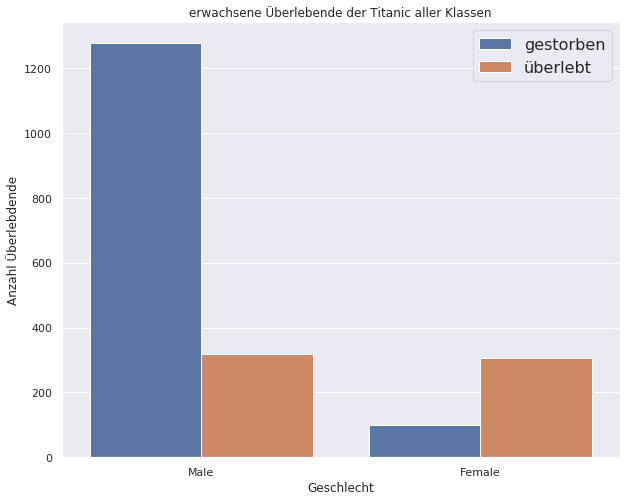

In [117]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
adult = titanic_df.loc[titanic_df['is_adult'] == True]

sns.set(style="darkgrid")
ax = sns.countplot(x='sex', hue='survived', data=adult)

print('Es gab insgesamt', adult.groupby('sex').sum().survived.sum(), 'Erwachsene von', len(adult), 'Erwachsenen die überlebt haben.')
plt.title('erwachsene Überlebende der Titanic aller Klassen')
plt.ylabel('Anzahl Überlebdende')
plt.xlabel('Geschlecht')
plt.legend(['gestorben', 'überlebt'], prop={'size': 16});
plt.show()

Es gab insgesamt 86.0 Kinder von 203 Kindern die überlebt haben.


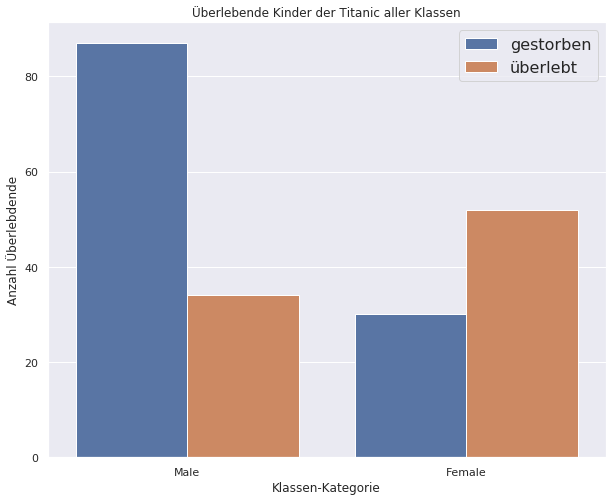

In [118]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
children = titanic_df.loc[titanic_df['is_adult'] == False]

sns.set(style="darkgrid")
ax = sns.countplot(x='sex', hue='survived', data=children)

print('Es gab insgesamt', children.groupby('sex').sum().survived.sum(), 'Kinder von', len(children), 'Kindern die überlebt haben.')
plt.title('Überlebende Kinder der Titanic aller Klassen')
plt.ylabel('Anzahl Überlebdende')
plt.xlabel('Klassen-Kategorie')
plt.legend(['gestorben', 'überlebt'], prop={'size': 16});
plt.show()

Die vorherigen Plots zeigen wer das Unglück auf der Titanic am ehesten überlebt hat. Es wird ersichtlich, dass ein grosser Teil der Frauen (359 von 489) überlebt haben, aber viele Männer bei diesem Unglück ums leben gekommen sind (nur 353 Männer von 1719 haben überlebt). Bei den Kinden haben tendenziell auch eher die Mädchen das Schiffsunglück überlebt als die Jungen. Daraus kann man ziehen, dass beim Unglück wahrscheinlich zuerst die Frauen und Kinder (vorallem von den 1st Class Passenger) auf die Rettungsboote gebracht wurden und viele Männer danach keinen Platz mehr hatten oder Besatzungsmitglieder (dort waren es doppelt so viele Männer wie Frauen) damit beschäftigt waren, die Passagiere auf die Rettungsboote zu bringen. Folglich verstarb ein grossteil der Besatzung beim Unglück sowie viele Männer von den Passagieren. 

### Aufgabe 9 (6 Punkte)

Untersuchen Sie nun, ob das Alter einen Einfluss auf die Überlebenswahrscheinlichkeit hatte.  

Teilen Sie die Passagiere dazu in Gruppen von Geschlecht und Altersjahrzenten ein.  
Berechnen Sie für die jeweiligen Gruppen den Anteil der Überlebenden, sowie den [*Standard Error of the Mean* (SEM)](https://en.wikipedia.org/wiki/Standard_error).  

Visualisieren Sie die Resultate übersichtlich und diskutieren Sie diese.  
Was können wir durch die Visualisierung des SEM erkennen?

In [17]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE